In [1]:
import pandas as pd
import re
def readLog(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    log_lines = []
    for i in range(len(lines)-1):
        if 'Train on the train set' in lines[i]:
            log_lines.append((lines[i+2], 'train'))
        elif 'Validation on the val set' in lines[i]:
            log_lines.append((lines[i+2], 'val'))
        elif 'Testing on the test set' in lines[i]:
            log_lines.append((lines[i+2], 'test'))
        else:
            continue
    log_df = pd.DataFrame(log_lines, columns=['log', 'type'])
    log_df['accuracy'] = log_df['log'].apply(lambda log_line: re.findall(r'Acc@1\s+(\d+\.\d+)', log_line)).str[0].astype(float)
    acc_dict = {'Train Accuracy': log_df.loc[log_df['type'] == 'train', 'accuracy'].values, 
                'Validation Accuracy': log_df.loc[log_df['type'] == 'val', 'accuracy'].values, 
                'Test Accuracy': log_df.loc[log_df['type'] == 'test', 'accuracy'].values}
    acc_df = pd.DataFrame.from_dict(acc_dict)
    return acc_df



In [6]:
file = 'CAN-resnet18-train-Sep-26-2023-00-21-10.log'
Proto = readLog(file)

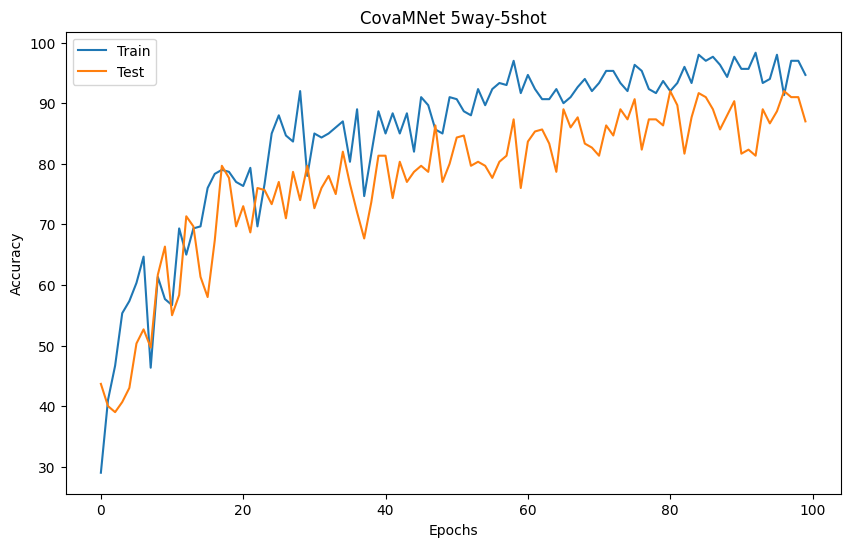

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# plt.plot(Proto['Train Accuracy'], label='Train')
# plt.plot(Proto['Validation Accuracy'], label='Validation')
plt.plot(Proto['Train Accuracy'], label='Train')
plt.plot(Proto['Test Accuracy'], label='Test')

plt.title('CAN 5way-5shot')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()